## Two sample testing for proportion

We're in the scenario where we only handle proportions but have no further information on the distribution of the data. That's why we use proportions_ztest.

$H_0: \mu_{men}$ = $\mu_{women}$  
$H_A: \mu_{men}$ < $\mu_{women}$

In [21]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

In [22]:
# Data
nobs = np.array([200, 100])
successes = np.array([0.51*200, 0.38*100])

# Z score (with p value)
z_score,pvalue = proportions_ztest(successes, nobs)

print(z_score,pvalue)

z_critical = norm.ppf(1-0.05)
print(z_critical)

2.127624429800926 0.03336823505701056
1.6448536269514722


## Two sample testing on the iris dataset

In [30]:
import pandas as pd
iris = pd.read_csv("Iris_Data.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
# Allows to group the data by species and have statistics on the 
# sepal_width attribute
iris.groupby("species")["sepal_width"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [33]:
setosa = iris[(iris["species"] == 'Iris-setosa')]
versicolor = iris[(iris["species"] == 'Iris-versicolor')]

In [35]:
# Testing the equality of variances on the two samples setosa and 
# versicolor for attribute sepal_width
from scipy.stats import levene
levene(setosa["sepal_width"], versicolor["sepal_width"])

LeveneResult(statistic=0.6635459332943233, pvalue=0.41728596812962016)

We can't reject the hypothesis that variances are equal.

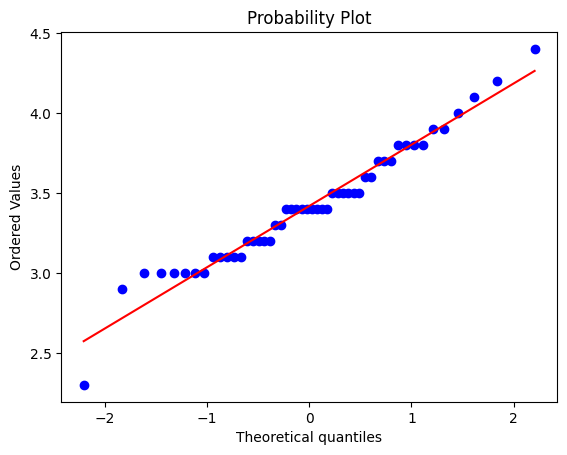

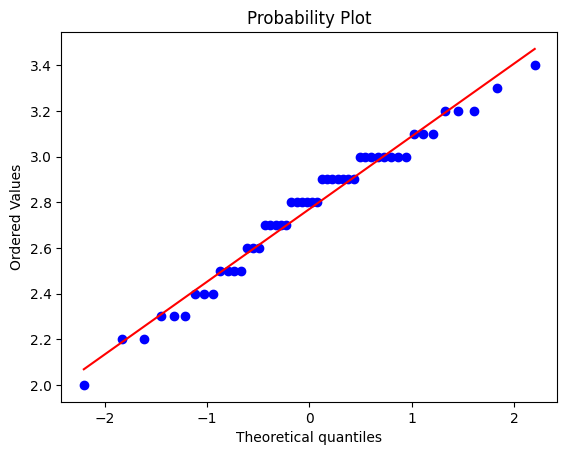

In [54]:
from scipy.stats import probplot
probplot(setosa["sepal_width"], dist="norm", plot=plt)
plt.show()
probplot(versicolor["sepal_width"], dist="norm", plot=plt)
plt.show()

In [53]:
from scipy.stats import ttest_ind
# Function calculating tscore for 2 independent samples
# H0: means are equal
ttest_ind(setosa["sepal_width"],versicolor["sepal_width"])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)